<a href="https://colab.research.google.com/github/bagasap10/COMP6577-MachineLearning/blob/main/FinalML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

FINAL TERM Python Notebook
>
**Bagas Aditya Putra**
>
**2301869494**

# **POKEDEX**

Import required libraries. **stats** from **scipy** to analyse the data (min max) and KMeans to do an unsupervised learning for the dataset.

In [149]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from pandas.plotting import scatter_matrix
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

Extract the dataset from GitHub using wget

In [150]:
!wget https://raw.githubusercontent.com/andrychowanda/COMP6577/master/pokedex.csv

--2021-07-17 16:35:34--  https://raw.githubusercontent.com/andrychowanda/COMP6577/master/pokedex.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 236904 (231K) [text/plain]
Saving to: ‘pokedex.csv.3’

pokedex.csv.3       100%[===================>] 231.35K  --.-KB/s    in 0.03s   

2021-07-17 16:35:34 (6.51 MB/s) - ‘pokedex.csv.3’ saved [236904/236904]



In [151]:
pokedex = pd.read_csv("pokedex.csv")
pokedex

,Unnamed: 0,pokedex_number,name,german_name,japanese_name,generation,status,species,type_number,type_1,type_2,height_m,weight_kg,abilities_number,ability_1,ability_2,ability_hidden,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_friendship,base_experience,growth_rate,egg_type_number,egg_type_1,egg_type_2,percentage_male,egg_cycles,against_normal,against_fire,against_water,against_electric,against_grass,against_ice,against_fight,against_poison,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,0,1,Bulbasaur,Bisasam,フシギダネ (Fushigidane),1,Normal,Seed Pokémon,2,Grass,Poison,0.7,6.9,2,Overgrow,NaN,Chlorophyll,318.0,45.0,49.0,49.0,65.0,65.0,45.0,45.0,70.0,64.0,Medium Slow,2,Grass,Monster,87.5,20.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.00,1.00,1.0,1.0,1.0,1.0,0.5
1,1,2,Ivysaur,Bisaknosp,フシギソウ (Fushigisou),1,Normal,Seed Pokémon,2,Grass,Poison,1.0,13.0,2,Overgrow,NaN,Chlorophyll,405.0,60.0,62.0,63.0,80.0,80.0,60.0,45.0,70.0,142.0,Medium Slow,2,Grass,Monster,87.5,20.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.00,1.00,1.0,1.0,1.0,1.0,0.5
2,2,3,Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,2,Grass,Poison,2.0,100.0,2,Overgrow,NaN,Chlorophyll,525.0,80.0,82.0,83.0,100.0,100.0,80.0,45.0,70.0,236.0,Medium Slow,2,Grass,Monster,87.5,20.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.00,1.00,1.0,1.0,1.0,1.0,0.5
3,3,3,Mega Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,2,Grass,Poison,2.4,155.5,1,Thick Fat,NaN,NaN,625.0,80.0,100.0,123.0,122.0,120.0,80.0,45.0,70.0,281.0,Medium Slow,2,Grass,Monster,87.5,20.0,1.0,1.0,0.5,0.5,0.25,1.0,0.5,1.0,1.0,2.0,2.0,1.00,1.00,1.0,1.0,1.0,1.0,0.5
4,4,4,Charmander,Glumanda,ヒトカゲ (Hitokage),1,Normal,Lizard Pokémon,1,Fire,NaN,0.6,8.5,2,Blaze,NaN,Solar Power,309.0,39.0,52.0,43.0,60.0,50.0,65.0,45.0,70.0,62.0,Medium Slow,2,Dragon,Monster,87.5,20.0,1.0,0.5,2.0,1.0,0.50,0.5,1.0,1.0,2.0,1.0,1.0,0.50,2.00,1.0,1.0,1.0,0.5,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,1023,888,Zacian Hero of Many Battles,NaN,NaN,8,Legendary,Warrior Pokémon,1,Fairy,NaN,2.8,110.0,1,Intrepid Sword,NaN,NaN,670.0,92.0,130.0,115.0,80.0,115.0,138.0,NaN,NaN,NaN,Slow,1,Undiscovered,NaN,NaN,120.0,1.0,1.0,1.0,1.0,1.00,1.0,0.5,2.0,1.0,1.0,1.0,0.50,1.00,1.0,0.0,0.5,2.0,1.0
1024,1024,889,Zamazenta Crowned Shield,NaN,NaN,8,Legendary,Warrior Pokémon,2,Fighting,Steel,2.9,785.0,1,Dauntless Shield,NaN,NaN,720.0,92.0,130.0,145.0,80.0,145.0,128.0,NaN,NaN,NaN,Slow,1,Undiscovered,NaN,NaN,120.0,0.5,2.0,1.0,1.0,0.50,0.5,2.0,0.0,2.0,1.0,1.0,0.25,0.25,1.0,0.5,0.5,0.5,1.0
1025,1025,889,Zamazenta Hero of Many Battles,NaN,NaN,8,Legendary,Warrior Pokémon,1,Fighting,NaN,2.9,210.0,1,Dauntless Shield,NaN,NaN,670.0,92.0,130.0,115.0,80.0,115.0,138.0,NaN,NaN,NaN,Slow,1,Undiscovered,NaN,NaN,120.0,1.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0,1.0,2.0,2.0,0.50,0.50,1.0,1.0,0.5,1.0,2.0
1026,1026,890,Eternatus,NaN,NaN,8,Legendary,Gigantic Pokémon,2,Poison,Dragon,20.0,950.0,1,Pressure,NaN,NaN,690.0,140.0,85.0,95.0,145.0,95.0,130.0,NaN,NaN,NaN,Slow,1,Undiscovered,NaN,NaN,120.0,1.0,0.5,0.5,0.5,0.25,2.0,0.5,0.5,2.0,1.0,2.0,0.50,1.00,1.0,2.0,1.0,1.0,1.0


By using .info() we can see the each column's data type to further process the data

In [152]:
pokedex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 51 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1028 non-null   int64  
 1   pokedex_number    1028 non-null   int64  
 2   name              1028 non-null   object 
 3   german_name       938 non-null    object 
 4   japanese_name     938 non-null    object 
 5   generation        1028 non-null   int64  
 6   status            1028 non-null   object 
 7   species           1028 non-null   object 
 8   type_number       1028 non-null   int64  
 9   type_1            1028 non-null   object 
 10  type_2            542 non-null    object 
 11  height_m          1028 non-null   float64
 12  weight_kg         1027 non-null   float64
 13  abilities_number  1028 non-null   int64  
 14  ability_1         1025 non-null   object 
 15  ability_2         513 non-null    object 
 16  ability_hidden    810 non-null    object 


Using .describe() to do basic count, mean, std, etc. for the dataset

1.   Count tells us the number of NoN-empty rows in a feature.
2.   Mean tells us the mean value of that feature.
3.   Std tells us the Standard Deviation Value of that feature.
4.   Min tells us the minimum value of that feature.
5.   25%, 50%, and 75% are the percentile/quartile of each features.
6.   Max tells us the maximum value of that feature.


In [153]:
pokedex.describe()

,Unnamed: 0,pokedex_number,generation,type_number,height_m,weight_kg,abilities_number,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_friendship,base_experience,egg_type_number,percentage_male,egg_cycles,against_normal,against_fire,against_water,against_electric,against_grass,against_ice,against_fight,against_poison,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
count,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1027.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,924.000000,924.000000,924.000000,1028.000000,792.000000,1027.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000
mean,513.500000,437.711089,4.034047,1.527237,1.368093,69.753749,2.284047,437.571984,69.577821,80.119650,74.475681,72.732490,72.132296,68.534047,93.172078,64.139610,153.814935,1.271401,55.003157,30.316456,0.868434,1.125486,1.053502,1.034290,1.004134,1.196498,1.078794,0.952335,1.084630,1.166342,0.979329,0.992461,1.239786,1.010700,0.975681,1.065661,0.980302,1.084874
std,296.902341,259.366480,2.234937,0.499501,3.380126,129.221230,0.794981,121.664910,26.385849,32.372321,31.303309,32.677698,28.083684,29.802103,75.240630,21.455464,79.270628,0.451417,20.182675,28.942912,0.286236,0.717742,0.613411,0.645167,0.748527,0.759471,0.754969,0.542982,0.784937,0.593030,0.499146,0.598301,0.699156,0.558533,0.377549,0.451054,0.503434,0.527743
min,0.000000,1.000000,1.000000,1.000000,0.100000,0.100000,0.000000,175.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,3.000000,0.000000,36.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.250000,0.000000,0.000000,0.250000,0.000000,0.000000
25%,256.750000,213.750000,2.000000,1.000000,0.600000,8.800000,2.000000,330.000000,50.000000,55.000000,50.000000,50.000000,50.000000,45.000000,45.000000,70.000000,67.000000,1.000000,50.000000,20.000000,1.000000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000,1.000000,0.500000,1.000000
50%,513.500000,433.500000,4.000000,2.000000,1.000000,28.500000,2.000000,455.000000,66.500000,76.000000,70.000000,65.000000,70.000000,65.000000,60.000000,70.000000,159.000000,1.000000,50.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,770.250000,663.250000,6.000000,2.000000,1.500000,69.100000,3.000000,510.000000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,127.000000,70.000000,201.500000,2.000000,50.000000,25.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.625000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1027.000000,890.000000,8.000000,2.000000,100.000000,999.900000,3.000000,1125.000000,255.000000,190.000000,250.000000,194.000000,250.000000,180.000000,255.000000,140.000000,608.000000,2.000000,100.000000,120.000000,1.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000


### Min Max



stats_column contains the original dataset column's header which has been selected to provide a parameter to work with

In [154]:
stats_column = ['total_points','hp','attack','defense','speed','sp_attack','sp_defense']

In [155]:
def find_min_max(column_name):
  min_index = pokedex[column_name].idxmin()
  min_pokemon = pokedex.loc[min_index, 'name']

  max_index = pokedex[column_name].idxmax()
  max_pokemon = pokedex.loc[max_index, 'name']

  print(f'Pokemon with MIN {column_name}: {min_pokemon}\nPokemon with MAX {column_name}: {max_pokemon}\n')
  return min_index, max_index

In [156]:
min_dict = {}
max_dict = {}
min_labels=[]
max_labels=[] 

for stat in stats_column:
  min_index, max_index = find_min_max(stat)
  max_dict[stat] = pokedex.loc[max_index, stat]
  min_dict[stat] = pokedex.loc[min_index, stat]
  max_labels.append(pokedex.loc[max_index, 'name'])
  min_labels.append(pokedex.loc[min_index, 'name'])

Pokemon with MIN total_points: Wishiwashi Solo Form
Pokemon with MAX total_points: Eternatus Eternamax

Pokemon with MIN hp: Shedinja
Pokemon with MAX hp: Blissey

Pokemon with MIN attack: Chansey
Pokemon with MAX attack: Mega Mewtwo X

Pokemon with MIN defense: Chansey
Pokemon with MAX defense: Eternatus Eternamax

Pokemon with MIN speed: Shuckle
Pokemon with MAX speed: Deoxys Speed Forme

Pokemon with MIN sp_attack: Alolan Sandshrew
Pokemon with MAX sp_attack: Mega Mewtwo Y

Pokemon with MIN sp_defense: Caterpie
Pokemon with MAX sp_defense: Eternatus Eternamax



### Distribution 

In [157]:
stats_df = pokedex[stats_column]

In [158]:
gen_type1 = pd.crosstab(pokedex['generation'], pokedex['type_1'])
gen_type1

type_1,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
generation,,,,,,,,,,,,,,,,,,
1,14,4,3,11,2,8,15,0,4,14,10,6,25,17,14,13,1,31
2,12,6,0,7,5,2,8,0,2,9,3,4,15,1,7,5,3,18
3,12,8,12,5,0,5,9,0,5,13,7,8,18,3,12,8,12,28
4,10,3,4,12,1,3,5,0,7,15,4,3,18,6,8,6,3,13
5,18,13,9,8,0,7,9,2,5,15,12,9,19,2,14,6,4,19
6,3,3,6,3,9,3,8,2,10,5,0,2,4,2,5,9,5,6
7,9,1,3,5,1,4,6,0,5,12,2,0,12,6,10,9,4,10
8,3,6,3,10,4,6,5,4,3,8,3,4,4,2,6,4,4,9


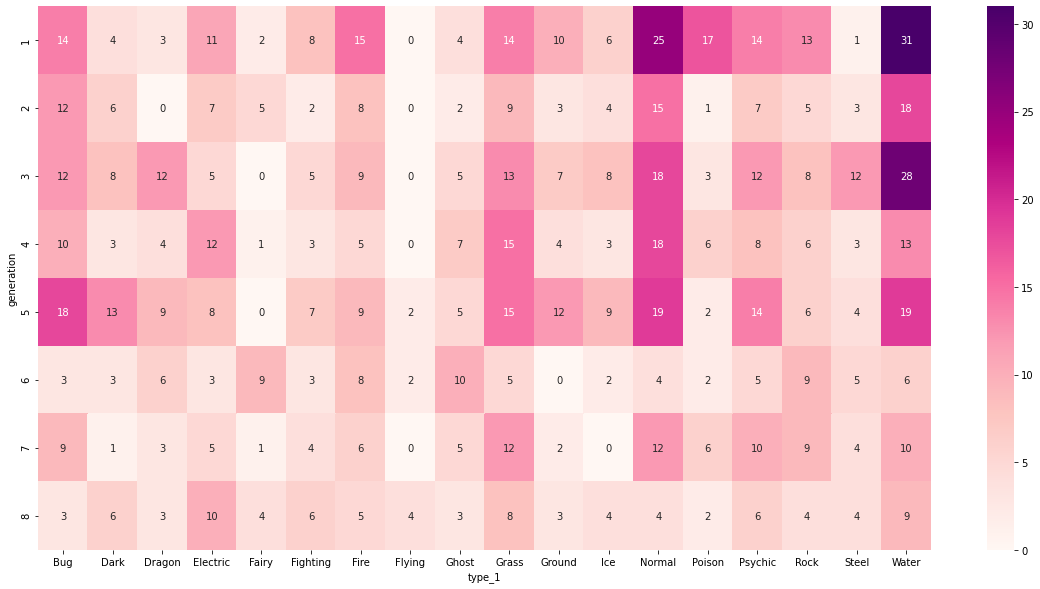

In [159]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(gen_type1, annot=True, cmap="RdPu")

In [160]:
gen_type2 = pd.crosstab(pokedex['generation'], pokedex['type_2'])
gen_type2

type_2,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
generation,,,,,,,,,,,,,,,,,,
1,0,3,2,3,6,2,0,23,1,2,6,4,2,22,8,2,6,4
2,0,2,2,2,3,2,3,19,0,1,8,1,0,3,3,3,3,0
3,2,7,3,0,8,4,1,14,3,5,9,0,2,2,16,4,0,4
4,1,4,4,0,1,7,1,16,2,2,8,5,0,2,2,1,9,2
5,0,3,3,4,3,10,8,19,5,5,2,3,0,5,2,4,9,0
6,0,4,5,0,5,1,0,6,5,10,4,2,4,0,3,0,0,4
7,2,1,5,2,11,6,2,12,5,1,2,1,0,1,2,0,5,4
8,4,2,8,0,4,0,2,0,4,0,0,3,3,3,2,1,3,1


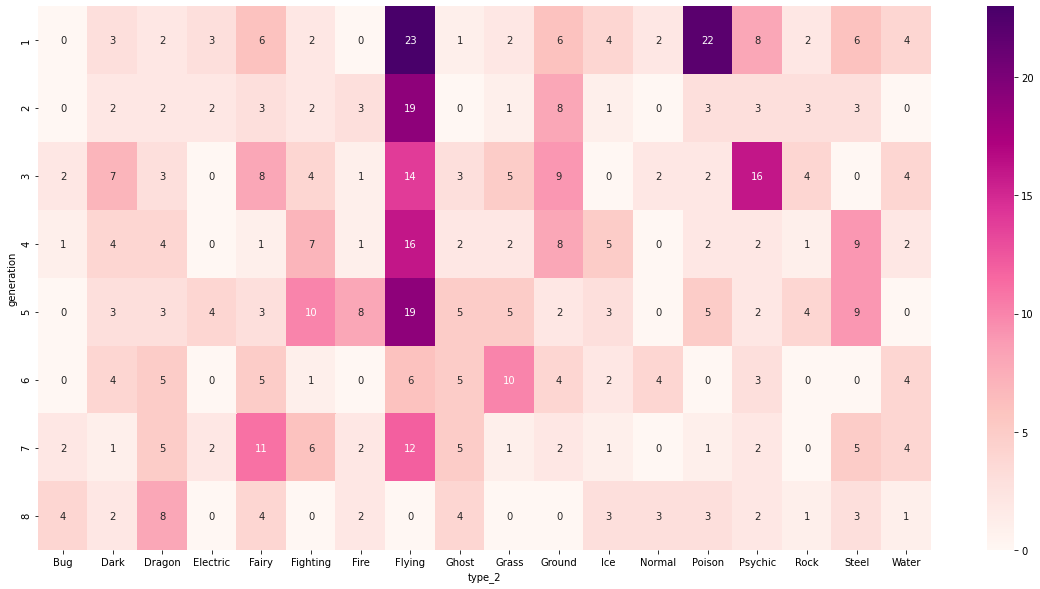

In [161]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(gen_type2, annot=True, cmap="RdPu")

To visualize how the stats are distributed, we can check **scatter_matrix**

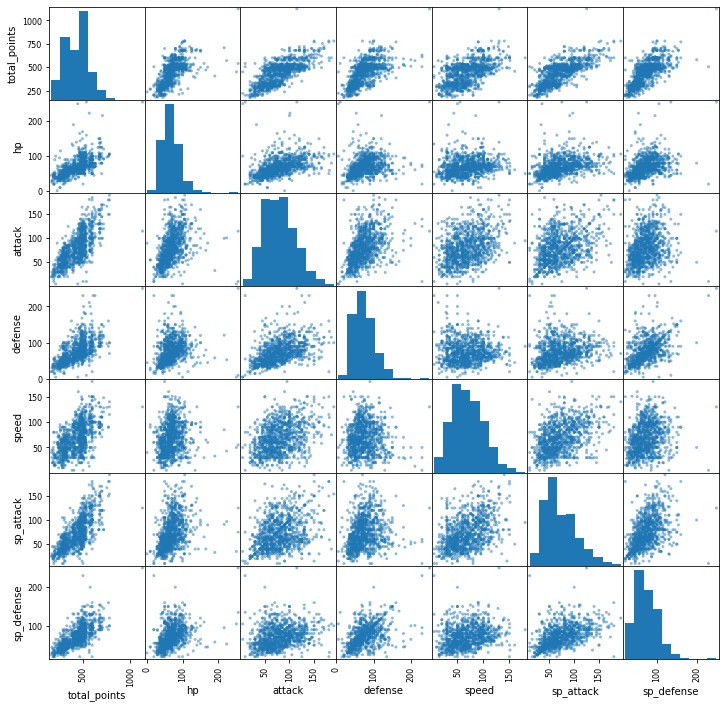

In [162]:
scatter_matrix(stats_df, figsize=[12,12])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

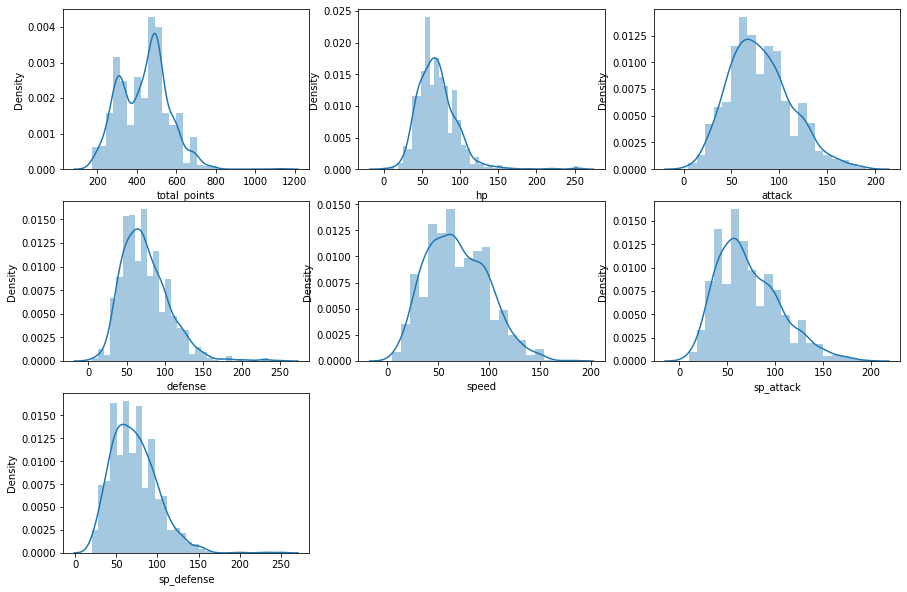

In [163]:
plt.figure(figsize=(15,10))

stats_column = ['total_points','hp','attack','defense','speed','sp_attack','sp_defense']

for i in range(1,8):
  plt.subplot(3,3,i)
  sns.distplot(pokedex[stats_column[i-1]], kde=True)

We can see that total_points is the only stat that shows two peaks in the distribution

In [164]:
def fit_stats(df, stat, show = True, label=None):
    # attack
    ax = sns.distplot(df[stat], label=label, kde=False, fit=stats.norm);

    # Get the fitted parameters used by sns
    (mu, sigma) = stats.norm.fit(df[stat])

    print (f"mu={mu}, sigma={sigma}")
    # Legend and labels 
    plt.legend(["normal dist. fit ($\mu=${0:.2g}, $\sigma=${1:.2f})".format(mu, sigma)])
    plt.ylabel('Frequency')

    # Cross-check
    x_dummy = np.linspace(stats.norm.ppf(0.01), stats.norm.ppf(0.99), 100)
    ax.plot(x_dummy, stats.norm.pdf(x_dummy, mu, sigma))
    plt.legend(["normal dist. fit ($\mu=${0:.2g}, $\sigma=${1:.2f})".format(mu, sigma),
               "cross-check"])
        
    if not show:
        plt.close()

    return [mu, sigma]

mu=437.5719844357977, sigma=121.60571961845353


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[437.5719844357977, 121.60571961845353]

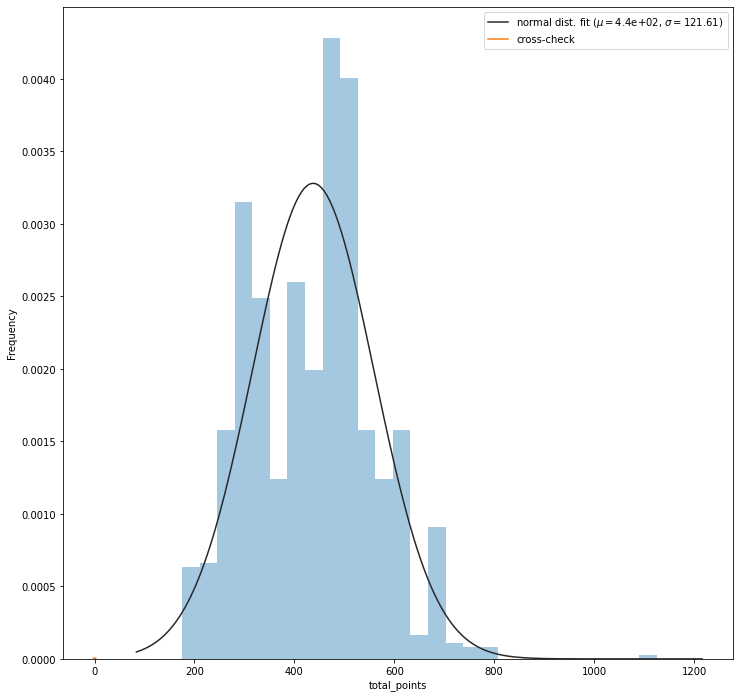

In [165]:
fit_stats(stats_df,'total_points')

We can see that after fitting **total_points** data, the peak of the data slimmed down to only one peak.

mu=80.11964980544747, sigma=32.356571916395374


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[80.11964980544747, 32.356571916395374]

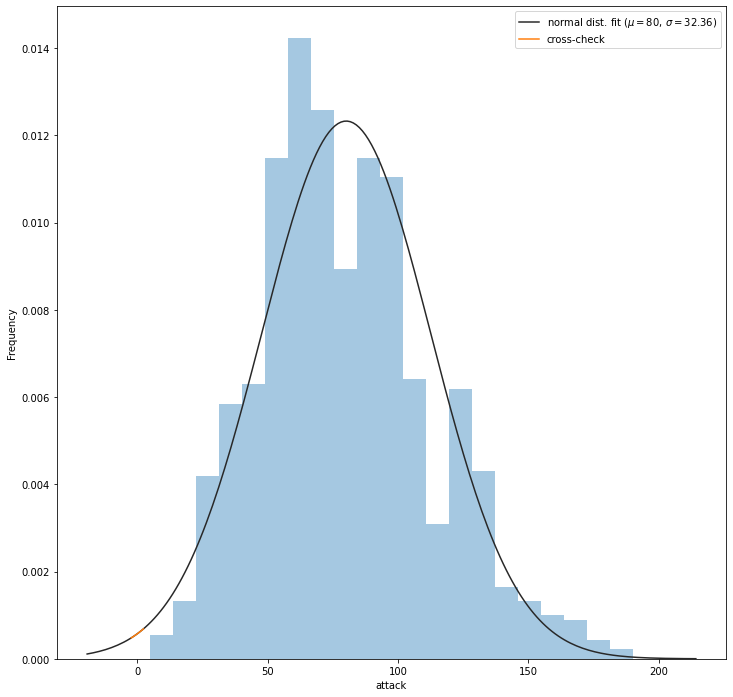

In [166]:
fit_stats(stats_df,'attack')

mu=74.47568093385215, sigma=31.288080176198164


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[74.47568093385215, 31.288080176198164]

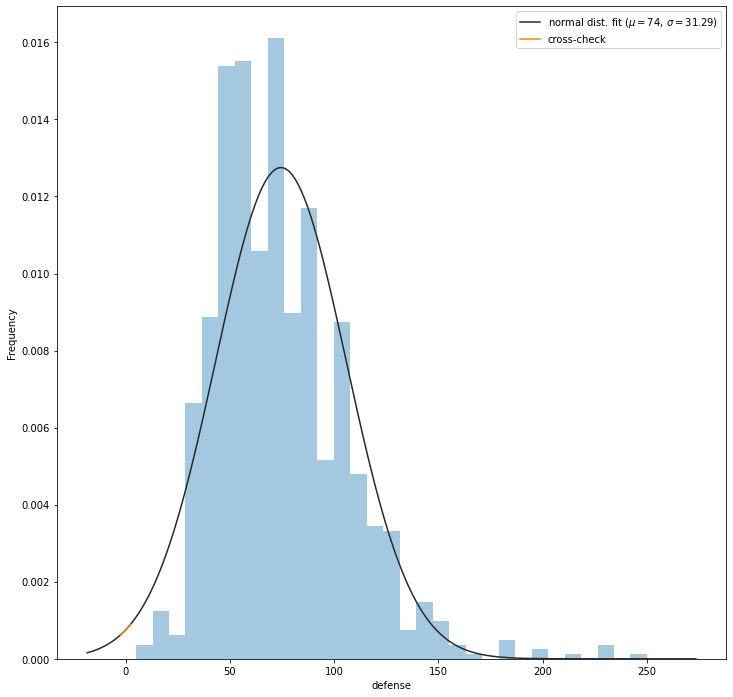

In [167]:
fit_stats(stats_df,'defense')

**Stats/Attributes Distribution**

In [168]:
selected_attr = ['total_points', 'hp', 'attack', 'defense', 'speed',
       'sp_attack', 'sp_defense', 'status', 'generation']

In [169]:
attr_df = pokedex[selected_attr]
attr_df.head()

,total_points,hp,attack,defense,speed,sp_attack,sp_defense,status,generation
0,318.0,45.0,49.0,49.0,45.0,65.0,65.0,Normal,1
1,405.0,60.0,62.0,63.0,60.0,80.0,80.0,Normal,1
2,525.0,80.0,82.0,83.0,80.0,100.0,100.0,Normal,1
3,625.0,80.0,100.0,123.0,80.0,122.0,120.0,Normal,1
4,309.0,39.0,52.0,43.0,65.0,60.0,50.0,Normal,1


In [170]:
le = LabelEncoder()
attr_df['status_encoded'] = le.fit_transform(attr_df['status'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [171]:
attr_df.head()

,total_points,hp,attack,defense,speed,sp_attack,sp_defense,status,generation,status_encoded
0,318.0,45.0,49.0,49.0,45.0,65.0,65.0,Normal,1,2
1,405.0,60.0,62.0,63.0,60.0,80.0,80.0,Normal,1,2
2,525.0,80.0,82.0,83.0,80.0,100.0,100.0,Normal,1,2
3,625.0,80.0,100.0,123.0,80.0,122.0,120.0,Normal,1,2
4,309.0,39.0,52.0,43.0,65.0,60.0,50.0,Normal,1,2


In [172]:
attr_df['status'].unique()

array(['Normal', 'Sub Legendary', 'Legendary', 'Mythical'], dtype=object)

In [173]:
attr_df['status_encoded'].unique()

array([2, 3, 0, 1])

Pokemon **status** are labeled with **status_encoded** using *LabelEncoder* per unique data. The next thing to do is to make a dictionary that fix the **status** and the **status_encoder** to match.

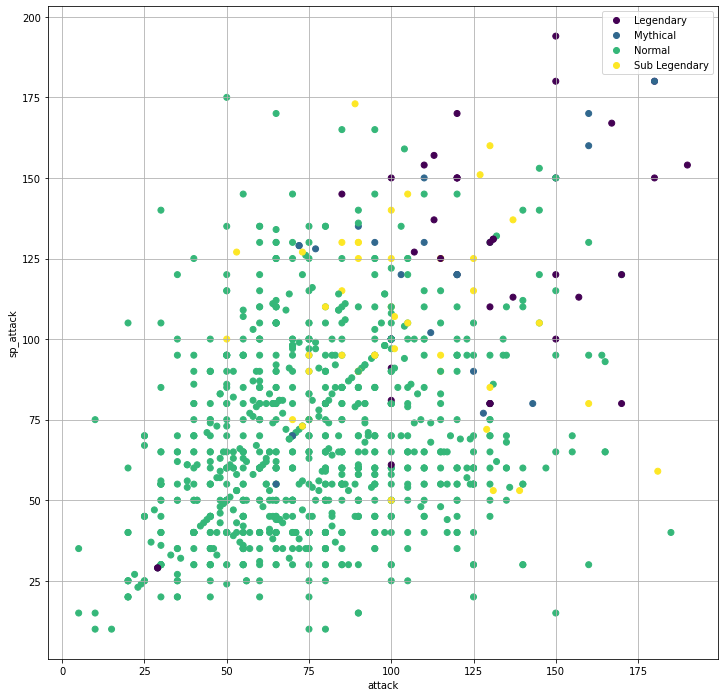

In [174]:
status_dict = {'Legendary' : 0,
               'Mythical' : 1,
               'Normal' : 2,
               'Sub Legendary' : 3}

scatter_att = plt.scatter(attr_df['attack'], attr_df['sp_attack'], c = attr_df['status_encoded'])
plt.xlabel('attack')
plt.ylabel('sp_attack')

plt.legend(handles=scatter_att.legend_elements()[0], labels = status_dict.keys())

plt.grid()
plt.show()

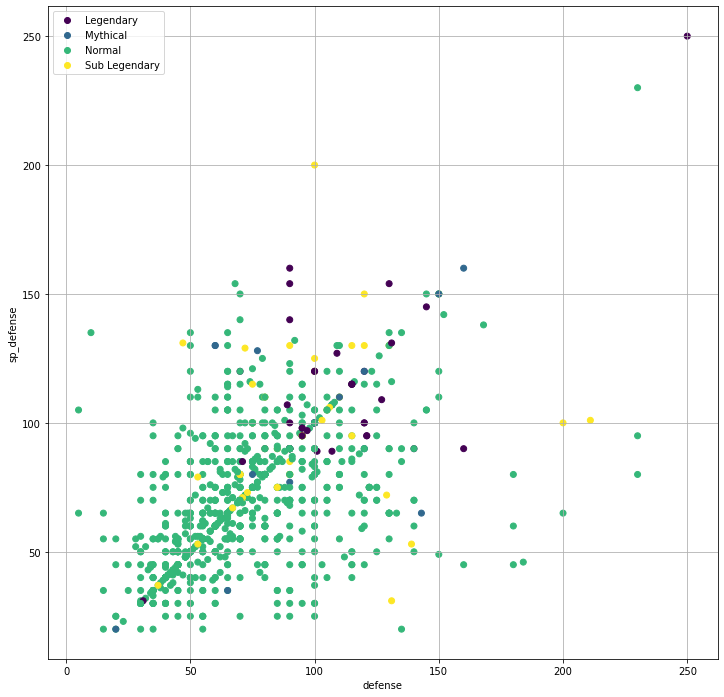

In [175]:
status_dict = {'Legendary' : 0,
               'Mythical' : 1,
               'Normal' : 2,
               'Sub Legendary' : 3}

scatter_def = plt.scatter(attr_df['defense'], attr_df['sp_defense'], c = attr_df['status_encoded'])
plt.xlabel('defense')
plt.ylabel('sp_defense')

plt.legend(handles=scatter_att.legend_elements()[0], labels = status_dict.keys())

plt.grid()
plt.show()

By the graphs above, we can see that Legendary Pokemon usually have high attack and defense

### Clean Data 

Described above, we dont need all of the data. Column's header like **Unnamed: 0**, **german_name**, **japanese_name**, and effective **against_** could be dropped. 

In [176]:
attr_drop = ['Unnamed: 0', 'japanese_name', 'german_name', 'against_normal', 'against_fire',
                  'against_water', 'against_electric', 'against_grass', 'against_ice',
                  'against_fight', 'against_poison', 'against_ground', 'against_flying',
                  'against_psychic', 'against_bug', 'against_rock', 'against_ghost',
                  'against_dragon', 'against_dark', 'against_steel', 'against_fairy']

pokedex = pokedex.drop(attr_drop, axis = 1)

Drop **NaN** values

In [177]:
pokedex = pokedex.dropna()

In [178]:
pokedex.isnull().sum()

pokedex_number      0
name                0
generation          0
status              0
species             0
type_number         0
type_1              0
type_2              0
height_m            0
weight_kg           0
abilities_number    0
ability_1           0
ability_2           0
ability_hidden      0
total_points        0
hp                  0
attack              0
defense             0
sp_attack           0
sp_defense          0
speed               0
catch_rate          0
base_friendship     0
base_experience     0
growth_rate         0
egg_type_number     0
egg_type_1          0
egg_type_2          0
percentage_male     0
egg_cycles          0
dtype: int64

We need to clean the data because some of the dataset attributes have an **Unnamed** attributes. In the dataset itself there is a **Not a Number (NaN)** values in which we cannot process.

The aim of this method is to easily cluster each pokemon, so we need a unique attributes from each pokemon.

### Unsupervised Learning

**Preprocessing**

In [179]:
scaler = StandardScaler()
scaler.fit(stats_df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [180]:
print(scaler.mean_)
print(scaler.scale_)

[437.57198444  69.57782101  80.11964981  74.47568093  68.53404669
  72.73249027  72.13229572]
[121.60571962  26.3730122   32.35657192  31.28808018  29.7876043
  32.66180069  28.07002098]


In [181]:
X = scaler.transform(stats_df)
X

array([[-0.98327599, -0.93193075, -0.96177215, ..., -0.79006175,
        -0.23674415, -0.25408943],
       [-0.26784912, -0.3631675 , -0.55999906, ..., -0.28649658,
         0.22250793,  0.28028851],
       [ 0.71894657,  0.39518349,  0.05811339, ...,  0.38492365,
         0.83484404,  0.99279243],
       ...,
       [ 1.9113247 ,  0.85019409,  1.54158328, ...,  2.3320423 ,
         0.22250793,  1.52717037],
       [ 2.07579065,  2.67023647,  0.15083026, ...,  2.06347421,
         2.21260029,  0.81466645],
       [ 5.65292502,  7.03075468,  1.07799894, ...,  2.06347421,
         1.60026418,  6.33657183]])

**KMeans**

In [182]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

KMNLabel = kmeans.labels_

print("KMN Labels : ", kmeans.labels_)
print("KMN Cluster Centre : ", kmeans.cluster_centers_)
print("Y Predict : ", y_pred)

KMN Labels :  [0 1 1 ... 2 2 2]
KMN Cluster Centre :  [[-1.12600727 -0.76844488 -0.808032   -0.72866814 -0.63010016 -0.77561727
  -0.8413501 ]
 [ 0.30111117  0.28077331  0.19936221  0.24769026  0.12411764  0.12587917
   0.25660702]
 [ 1.54617867  0.80474164  1.16516864  0.82479878  1.01287372  1.33629236
   1.05011245]]
Y Predict :  [0 1 1 ... 2 2 2]


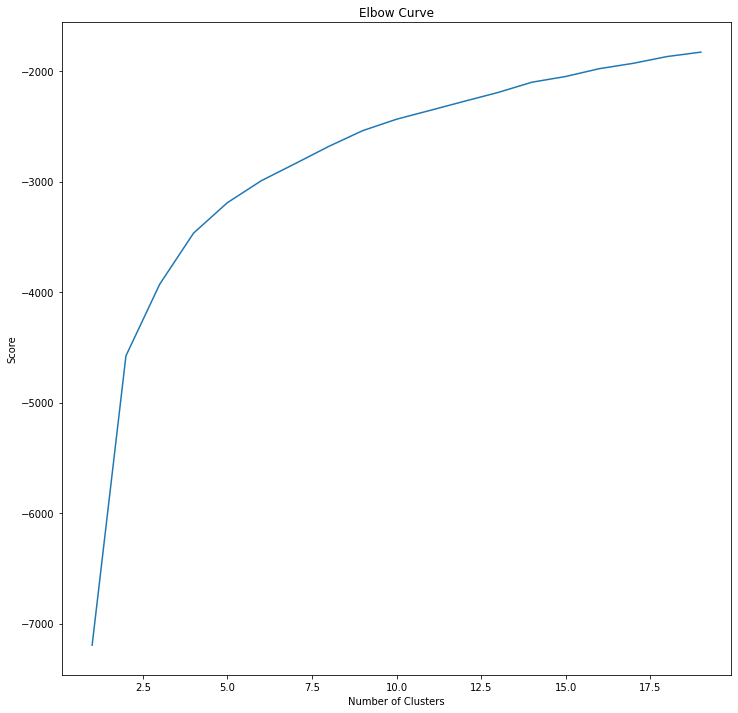

In [183]:
Ks = range(1,20)
KMNs = [KMeans(n_clusters=i) for i in Ks]
score = [KMNs[i].fit(X).score(X) for i in range(len(KMNs))]

plt.plot(Ks, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

After finding the KMeans, let's visualize KMeans result

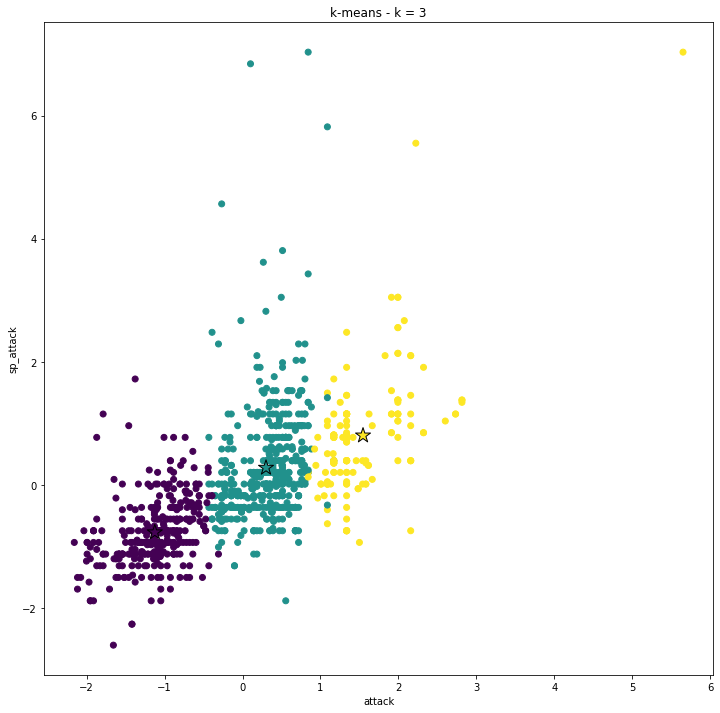

In [184]:
plt.scatter(X[:,0], X[:,1], c = y_pred)

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker = '*', s = 250, c = [0,1,2], edgecolors='k')

plt.xlabel('attack')
plt.ylabel('sp_attack')
plt.title('k-means - k = 3')
plt.show();

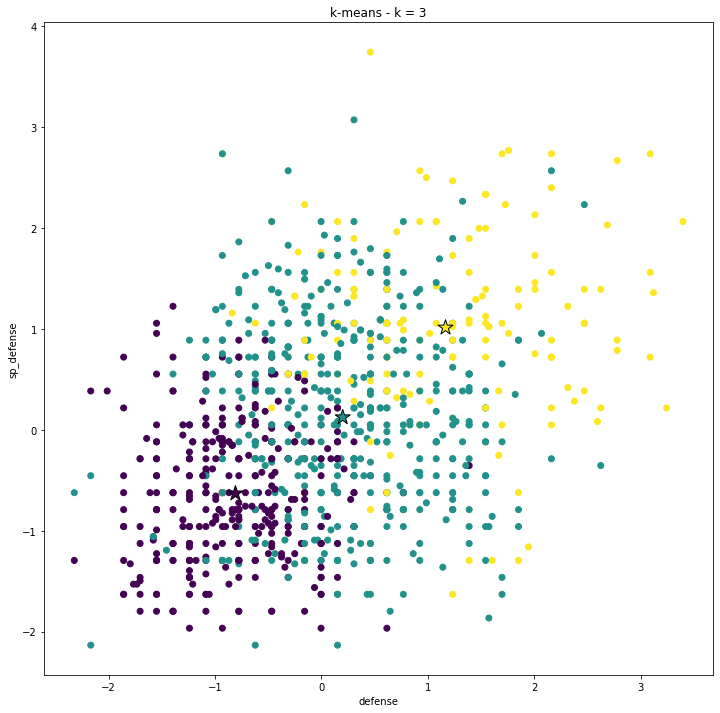

In [185]:
plt.scatter(X[:,2], X[:,4], c = y_pred)

plt.scatter(kmeans.cluster_centers_[:,2], kmeans.cluster_centers_[:,4], marker = '*', s = 250, c = [0,1,2], edgecolors='k')

plt.xlabel('defense')
plt.ylabel('sp_defense')
plt.title('k-means - k = 3')
plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 76.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 86.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 59.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/pyth

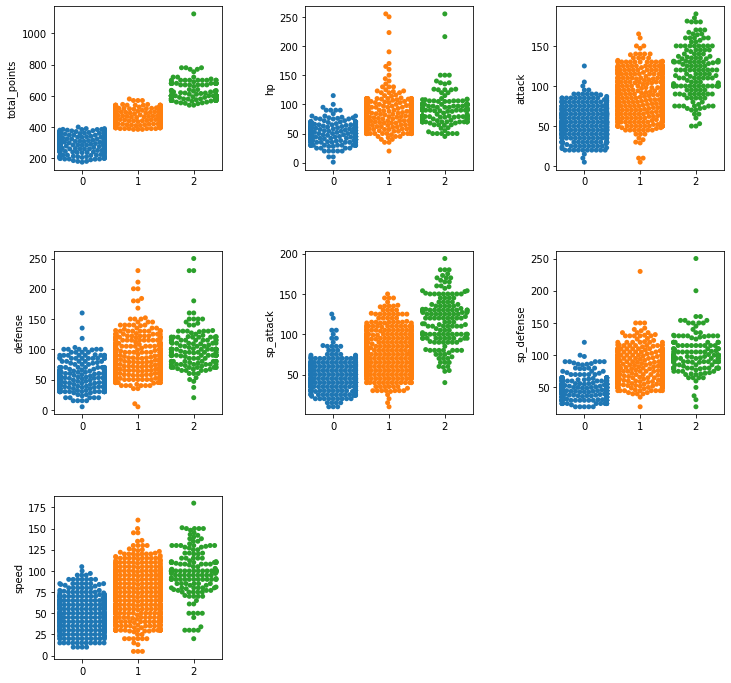

In [186]:
plt.subplot(331)
sns.swarmplot(KMNLabel , stats_df['total_points'])
plt.subplot(332)
sns.swarmplot(KMNLabel , stats_df['hp'])
plt.subplot(333)
sns.swarmplot(KMNLabel , stats_df['attack'])
plt.subplot(334)
sns.swarmplot(KMNLabel , stats_df['defense'])
plt.subplot(335)
sns.swarmplot(KMNLabel , stats_df['sp_attack'])
plt.subplot(336)
sns.swarmplot(KMNLabel , stats_df['sp_defense'])
plt.subplot(337)
sns.swarmplot(KMNLabel , stats_df['speed'])
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
plt.rcParams["figure.figsize"] = [12,12]
plt.show()

After we get KMeans result, we can evaluate the model and the result using:
1. Silhouette Coeffecient
2. Dunn's Index
3. Davies-Bouldin Index
>
For now I only use silhouette coeffecient as the evaluation metrics

In [187]:
print("Silhouette Coefficient : ", silhouette_score(X, y_pred))

Silhouette Coefficient :  0.26875325880639217


We have a low score of 0.26 because we choose too many features to cluster. Usually in some of cases, lesser features provide better scores

In [196]:
stats2_column = ['attack','sp_attack']
stats2_df = pokedex[stats2_column]

In [197]:
scaler.fit(stats2_df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [198]:
X2 = scaler.transform(stats2_df)
X2

array([[ 1.18398237,  0.64852575],
       [-0.01948383, -0.92768618],
       [ 0.92072414, -0.3366067 ],
       [-0.20752542, -1.12471267],
       [ 0.16855777,  1.23960523],
       [ 0.73268254, -0.4154173 ],
       [-0.01948383,  0.05744628],
       [ 0.54464095, -1.51876565],
       [ 2.23701529, -0.92768618],
       [ 0.54464095,  0.64852575],
       [-1.14773339,  0.84555224],
       [-0.39556701,  1.8306847 ],
       [ 0.35659936, -0.5336332 ],
       [ 1.67289051, -0.13958021],
       [-1.14773339,  0.45149926],
       [-1.89989976, -1.91281863],
       [-0.7716502 , -0.3366067 ],
       [-1.33577498, -1.32173916],
       [-0.95969179, -0.92768618],
       [-0.58360861, -0.5336332 ],
       [-0.95969179, -1.71579214],
       [ 0.54464095, -0.13958021],
       [ 0.16855777,  1.23960523],
       [-0.58360861, -0.13958021],
       [-0.58360861, -0.13958021],
       [ 0.92072414,  1.04257873],
       [-1.52381657, -1.12471267],
       [-0.7716502 , -0.3366067 ],
       [-0.01948383,

In [199]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X2)
y2_pred = kmeans.predict(X2)

KMNLabel = kmeans.labels_

print("KMN Labels : ", kmeans.labels_)
print("KMN Cluster Centre : ", kmeans.cluster_centers_)
print("Y Predict : ", y2_pred)

KMN Labels :  [0 2 0 2 1 0 1 0 0 1 1 1 0 0 1 2 2 2 2 2 2 0 1 2 2 1 2 2 1 2 0 2 1 2 2 1 0
 0 1 0 1 2 1 1 0 0 1 1 1 2 0 0 1 2 1 2 1 2 0 2 0 0 0 2 1 1 0 2 0 2 1 2 1 0
 1 2 0 2 1 2 1 0 1]
KMN Cluster Centre :  [[ 1.13734805 -0.28143929]
 [-0.11544988  1.0697548 ]
 [-0.86502258 -0.82713473]]
Y Predict :  [0 2 0 2 1 0 1 0 0 1 1 1 0 0 1 2 2 2 2 2 2 0 1 2 2 1 2 2 1 2 0 2 1 2 2 1 0
 0 1 0 1 2 1 1 0 0 1 1 1 2 0 0 1 2 1 2 1 2 0 2 0 0 0 2 1 1 0 2 0 2 1 2 1 0
 1 2 0 2 1 2 1 0 1]


In [200]:
print("Silhouette Coefficient : ", silhouette_score(X2, y2_pred))

Silhouette Coefficient :  0.4223801967316411


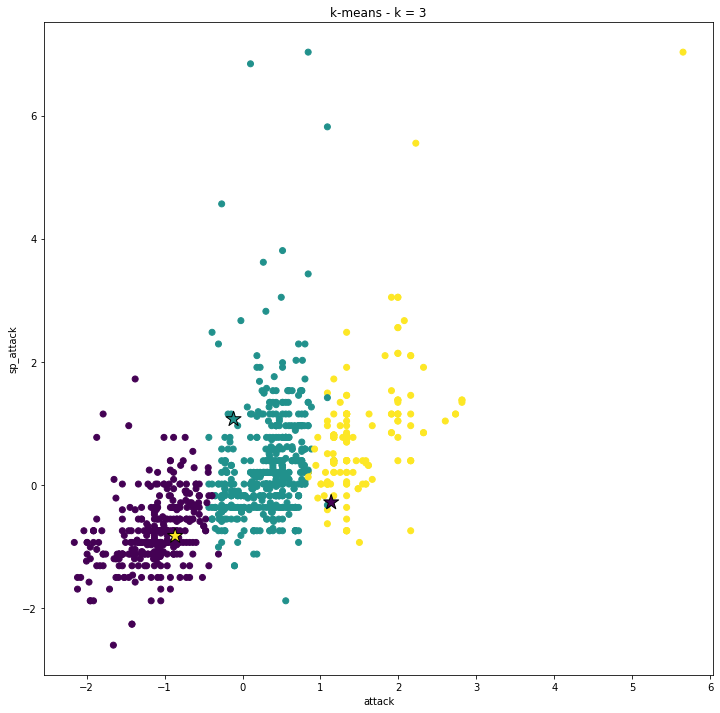

In [201]:
plt.scatter(X[:,0], X[:,1], c = y_pred)

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker = '*', s = 250, c = [0,1,2], edgecolors='k')

plt.xlabel('attack')
plt.ylabel('sp_attack')
plt.title('k-means - k = 3')
plt.show();

We can see the improvement by choosing 2 random features. The border between each cluster is not vague. Although there is still some data that overlap the border.
>
 More features that relates with each other, the higher the score is.

>

---


# **Heart Disease**

Import required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

Download the dataset from GitHub using wget

In [2]:
!wget https://raw.githubusercontent.com/andrychowanda/COMP6577/master/heart.csv

--2021-07-19 04:08:36--  https://raw.githubusercontent.com/andrychowanda/COMP6577/master/heart.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13273 (13K) [text/plain]
Saving to: ‘heart.csv.3’

heart.csv.3         100%[===================>]  12.96K  --.-KB/s    in 0s      

2021-07-19 04:08:36 (86.0 MB/s) - ‘heart.csv.3’ saved [13273/13273]



In [3]:
heart_df = pd.read_csv("heart.csv")
heart_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,fixed,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,normal,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,reversible,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,normal,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,52,1,1,118,186,0,2,190,0,0.0,2,0,fixed,0
299,43,0,4,132,341,1,2,136,1,3.0,2,0,reversible,1
300,65,1,4,135,254,0,2,127,0,2.8,2,1,reversible,1
301,48,1,4,130,256,1,2,150,1,0.0,1,2,reversible,1


By using .info() we can see the each column's data type to further process the data

In [4]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 33.3+ KB


Using .describe() to do basic count, mean, std, etc. for the dataset

1.   Count tells us the number of NoN-empty rows in a feature.
2.   Mean tells us the mean value of that feature.
3.   Std tells us the Standard Deviation Value of that feature.
4.   Min tells us the minimum value of that feature.
5.   25%, 50%, and 75% are the percentile/quartile of each features.
6.   Max tells us the maximum value of that feature.

In [5]:
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.594059,0.676568,3.108911,131.785479,246.547855,0.148515,0.990099,149.194719,0.326733,1.057756,1.590759,0.683168,0.273927
std,9.016370,0.468560,1.028414,17.748338,52.175933,0.356198,0.988293,23.173368,0.469794,1.165025,0.617767,0.937773,0.446710
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,152.000000,0.000000,0.800000,2.000000,0.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,165.500000,1.000000,1.600000,2.000000,1.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000


Check for **null values**

In [7]:
heart_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Data Exploration

In [8]:
heart_df.target.value_counts()

0    220
1     83
Name: target, dtype: int64

In [9]:
noDiseaseCount = len(heart_df[heart_df.target == 0])
haveDiseaseCount = len(heart_df[heart_df.target == 1])

print("Percentage of patients does have heart disease : {:.2f}%".format((haveDiseaseCount / (len(heart_df.target))*100)))
print("Percentage of Patients does not have Heart Disease: {:.2f}%".format((noDiseaseCount / (len(heart_df.target))*100)))

Percentage of patients does have heart disease : 27.39%
Percentage of Patients does not have Heart Disease: 72.61%


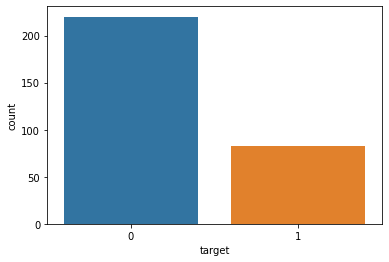

In [10]:
sns.countplot(x='target', data=heart_df)
plt.show()

In [11]:
femaleCount = len(heart_df[heart_df.sex == 0])
maleCount = len(heart_df[heart_df.sex == 1])

print("Percentage of Male patients: {:.2f}%".format((maleCount / (len(heart_df.sex))*100)))
print("Percentage of Female patients: {:.2f}%".format((femaleCount / (len(heart_df.sex))*100)))

Percentage of Male patients: 67.66%
Percentage of Female patients: 32.34%


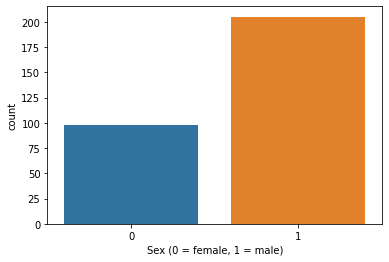

In [12]:
sns.countplot(x='sex', data=heart_df)
plt.xlabel("Sex (0 = female, 1 = male)")
plt.show()

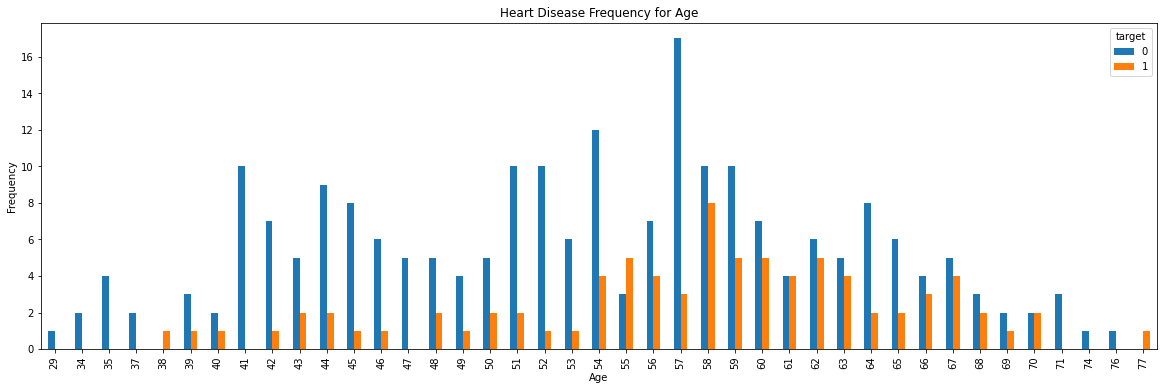

In [13]:
pd.crosstab(heart_df.age, heart_df.target).plot(kind='bar', figsize=(20,6))
plt.title('Heart Disease Frequency for Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

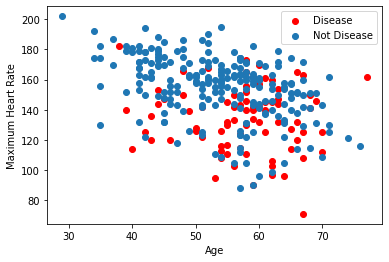

In [14]:
plt.scatter(x=heart_df.age[heart_df.target==1], y=heart_df.thalach[(heart_df.target==1)], c ="red")
plt.scatter(x=heart_df.age[heart_df.target==0], y=heart_df.thalach[(heart_df.target==0)])

plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

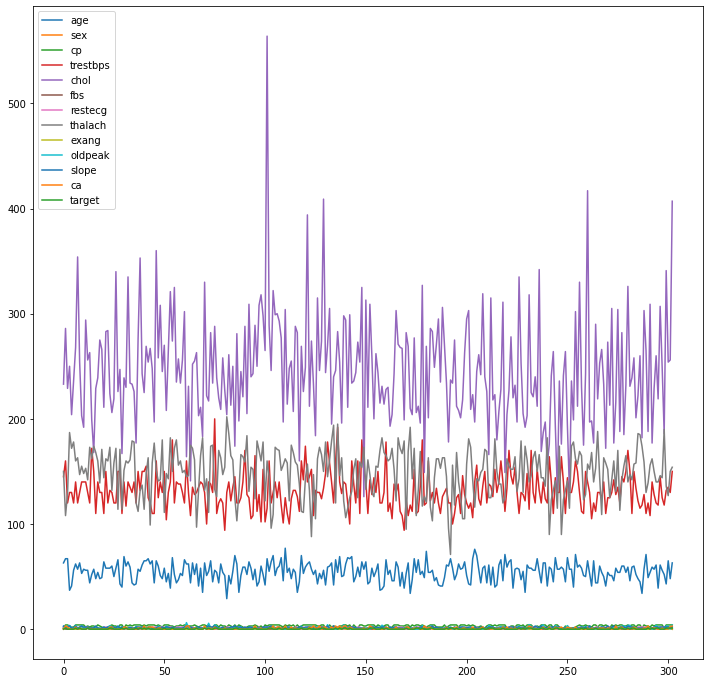

In [15]:
heart_df.plot(figsize = (12,12))
plt.show()

This graph can shows the outliers in the dataset.

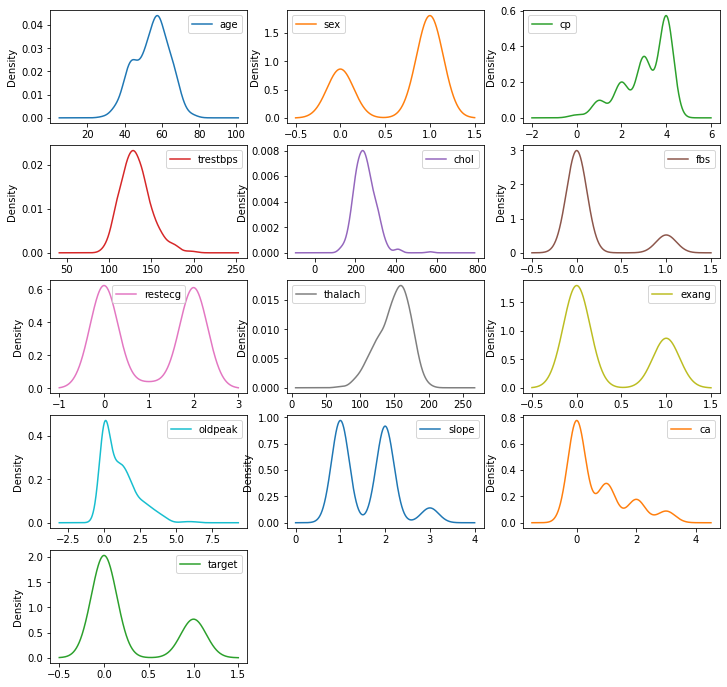

In [16]:
heart_df.plot(kind="density", subplots = True, layout = (5,3), figsize = (12,12), sharex = False)
plt.show()

### Feature Engineering

There are still some categorical variables that exists in the dataframe, we will convert that into a dummy variables

In [17]:
a = pd.get_dummies(heart_df['cp'], prefix = "cp")
b = pd.get_dummies(heart_df['thal'], prefix = "thal")
c = pd.get_dummies(heart_df['slope'], prefix = "slope")

In [18]:
frames = [heart_df, a, b, c]
heart_df = pd.concat(frames, axis = 1)
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cp_0,cp_1,cp_2,cp_3,cp_4,thal_1,thal_2,thal_fixed,thal_normal,thal_reversible,slope_1,slope_2,slope_3
0,63,1,1,145,233,1,2,150,0,2.3,3,0,fixed,0,0,1,0,0,0,0,0,1,0,0,0,0,1
1,67,1,4,160,286,0,2,108,1,1.5,2,3,normal,1,0,0,0,0,1,0,0,0,1,0,0,1,0
2,67,1,4,120,229,0,2,129,1,2.6,2,2,reversible,0,0,0,0,0,1,0,0,0,0,1,0,1,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,normal,0,0,0,0,1,0,0,0,0,1,0,0,0,1
4,41,0,2,130,204,0,2,172,0,1.4,1,0,normal,0,0,0,1,0,0,0,0,0,1,0,1,0,0


In [19]:
heart_df = heart_df.drop(columns = ['cp', 'thal', 'slope'])
heart_df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target,cp_0,cp_1,cp_2,cp_3,cp_4,thal_1,thal_2,thal_fixed,thal_normal,thal_reversible,slope_1,slope_2,slope_3
0,63,1,145,233,1,2,150,0,2.3,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
1,67,1,160,286,0,2,108,1,1.5,3,1,0,0,0,0,1,0,0,0,1,0,0,1,0
2,67,1,120,229,0,2,129,1,2.6,2,0,0,0,0,0,1,0,0,0,0,1,0,1,0
3,37,1,130,250,0,0,187,0,3.5,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
4,41,0,130,204,0,2,172,0,1.4,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0


We could continue to normalize the data.

In [20]:
y = heart_df.target.values
x_df = heart_df.drop(['target'], axis = 1)


In [21]:
x = (x_df - np.min(x_df)) / (np.max(x_df) - np.min(x_df)).values

The data will be split into 2 where 80% of the data will be **train data**, and 20% will be **test data**

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

After that we proceed to transpose the metrices

In [23]:
x_train = x_train.T
y_train = y_train.T

x_test = x_test.T
y_test = y_test.T

Let the weight be 0.01 and the bias 0.0

In [24]:
def init(dimension):
  weight = np.full((dimension, 1), 0.01)
  bias =0.0
  return weight, bias

**Sigmoid Funtion**

In [25]:
def sigmoid(z):
  y_head = 1/(1+np.exp(-z))
  return y_head

**Forward and Backward Propagation**

In [26]:
def forwardBackward(weight,bias,x_train,y_train):
    # Forward
    
    y_head = sigmoid(np.dot(weight.T,x_train) + bias)
    loss = -(y_train*np.log(y_head) + (1-y_train)*np.log(1-y_head))
    cost = np.sum(loss) / x_train.shape[1]
    
    # Backward
    derivative_weight = np.dot(x_train,((y_head-y_train).T))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"Derivative Weight" : derivative_weight, "Derivative Bias" : derivative_bias}
    
    return cost,gradients

In [27]:
def update(weight,bias,x_train,y_train,learningRate,iteration) :
    costList = []
    index = []
    
    #for each iteration, update weight and bias values
    for i in range(iteration):
        cost,gradients = forwardBackward(weight,bias,x_train,y_train)
        weight = weight - learningRate * gradients["Derivative Weight"]
        bias = bias - learningRate * gradients["Derivative Bias"]
        
        costList.append(cost)
        index.append(i)

    parameters = {"weight": weight,"bias": bias}
    
    print("iteration:",iteration)
    print("cost:",cost)

    plt.plot(index,costList)
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()

    return parameters, gradients

In [28]:
def predict(weight,bias,x_test):
    z = np.dot(weight.T,x_test) + bias
    y_head = sigmoid(z)

    y_prediction = np.zeros((1,x_test.shape[1]))
    
    for i in range(y_head.shape[1]):
        if y_head[0,i] <= 0.5:
            y_prediction[0,i] = 0
        else:
            y_prediction[0,i] = 1
    return y_prediction

### **Logistic Regression**

This is a manual logistic regression

In [29]:
def logistic_regression(x_train,y_train,x_test,y_test,learningRate,iteration):
    dimension = x_train.shape[0]
    weight,bias = init(dimension)
    
    parameters, gradients = update(weight,bias,x_train,y_train,learningRate,iteration)

    y_prediction = predict(parameters["weight"],parameters["bias"],x_test)
    
    print("Manuel Test Accuracy: {:.2f}%".format((100 - np.mean(np.abs(y_prediction - y_test))*100)))

iteration: 100
cost: 0.3033597713662635


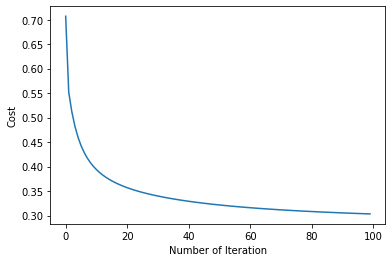

Manuel Test Accuracy: 83.61%


In [30]:
logistic_regression(x_train,y_train,x_test,y_test,1,100)

SKLearn Logistic Regression

In [31]:
accuracies = {}

lr = LogisticRegression()
lr.fit(x_train.T,y_train.T)
lr_acc = lr.score(x_test.T,y_test.T)*100

accuracies['Logistic Regression'] = lr_acc
print("Test Accuracy {:.2f}%".format(lr_acc))

Test Accuracy 81.97%


### **SVM**

In [32]:
svm = SVC(random_state = 1)
svm.fit(x_train.T, y_train.T)

svm_acc = svm.score(x_test.T,y_test.T)*100
accuracies['SVM'] = svm_acc
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(svm_acc))

Test Accuracy of SVM Algorithm: 81.97%


### **KNN**

In [33]:
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(x_train.T, y_train.T)
prediction = knn.predict(x_test.T)

print("{} KNN Score: {:.2f}%".format(2, knn.score(x_test.T, y_test.T)*100))

2 KNN Score: 80.33%


Find best K value

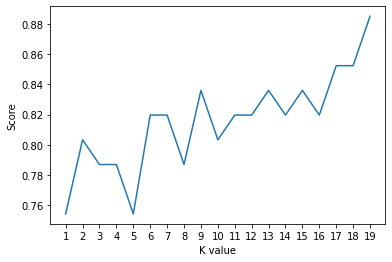

Maximum KNN Score is 88.52%


In [34]:
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(x_train.T, y_train.T)
    scoreList.append(knn2.score(x_test.T, y_test.T))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

knn_acc = max(scoreList)*100
accuracies['KNN'] = knn_acc
print("Maximum KNN Score is {:.2f}%".format(knn_acc))

### **Naive Bayes**

In [35]:
nb = GaussianNB()
nb.fit(x_train.T, y_train.T)

nb_acc = nb.score(x_test.T,y_test.T)*100
accuracies['Naive Bayes'] = nb_acc
print("Accuracy of Naive Bayes: {:.2f}%".format(nb_acc))

Accuracy of Naive Bayes: 34.43%


### **Random Forest**

In [36]:
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(x_train.T, y_train.T)

rf_acc = rf.score(x_test.T,y_test.T)*100
accuracies['Random Forest'] = rf_acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(rf_acc))

Random Forest Algorithm Accuracy Score : 81.97%


### **Decision Tree**

In [37]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train.T, y_train.T)

dt_acc = dtc.score(x_test.T, y_test.T)*100
accuracies['Decision Tree'] = dt_acc
print("Decision Tree Test Accuracy {:.2f}%".format(dt_acc))

Decision Tree Test Accuracy 78.69%


After we got all of the methods accuracy, we can compare each methods accuracy with one another to find the best method to do a classification on this dataset.

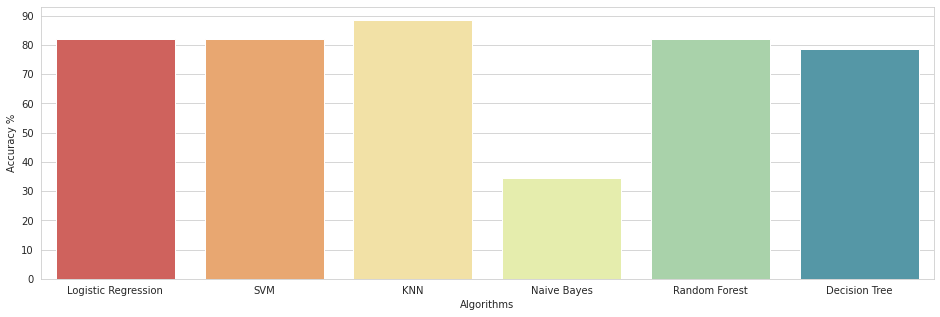

In [45]:
sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette='Spectral')
plt.show()


The highest accuracy is held by KNN. Followed by 3 methods which are Logistic Regression, SVM, and Random Forest. Higher than Decision Tree, and the last least accuracy is Naive Bayes

1.   KNN = 88.5%
2.   Logistic Regression = 81.97%
2.   SVM = 81.97%
2.   Random Forest = 81.97%
3.   Decision Tree = 78.69%
4.   Naive Bayes = 34.43%



Lets take a look at the confusion matrix from each methods

In [40]:
y_head_lr = lr.predict(x_test.T)
knn3 = KNeighborsClassifier(n_neighbors = 3)
knn3.fit(x_train.T, y_train.T)
y_head_knn = knn3.predict(x_test.T)
y_head_svm = svm.predict(x_test.T)
y_head_nb = nb.predict(x_test.T)
y_head_dtc = dtc.predict(x_test.T)
y_head_rf = rf.predict(x_test.T)

In [41]:
cm_lr = confusion_matrix(y_test,y_head_lr)
cm_knn = confusion_matrix(y_test,y_head_knn)
cm_svm = confusion_matrix(y_test,y_head_svm)
cm_nb = confusion_matrix(y_test,y_head_nb)
cm_dtc = confusion_matrix(y_test,y_head_dtc)
cm_rf = confusion_matrix(y_test,y_head_rf)

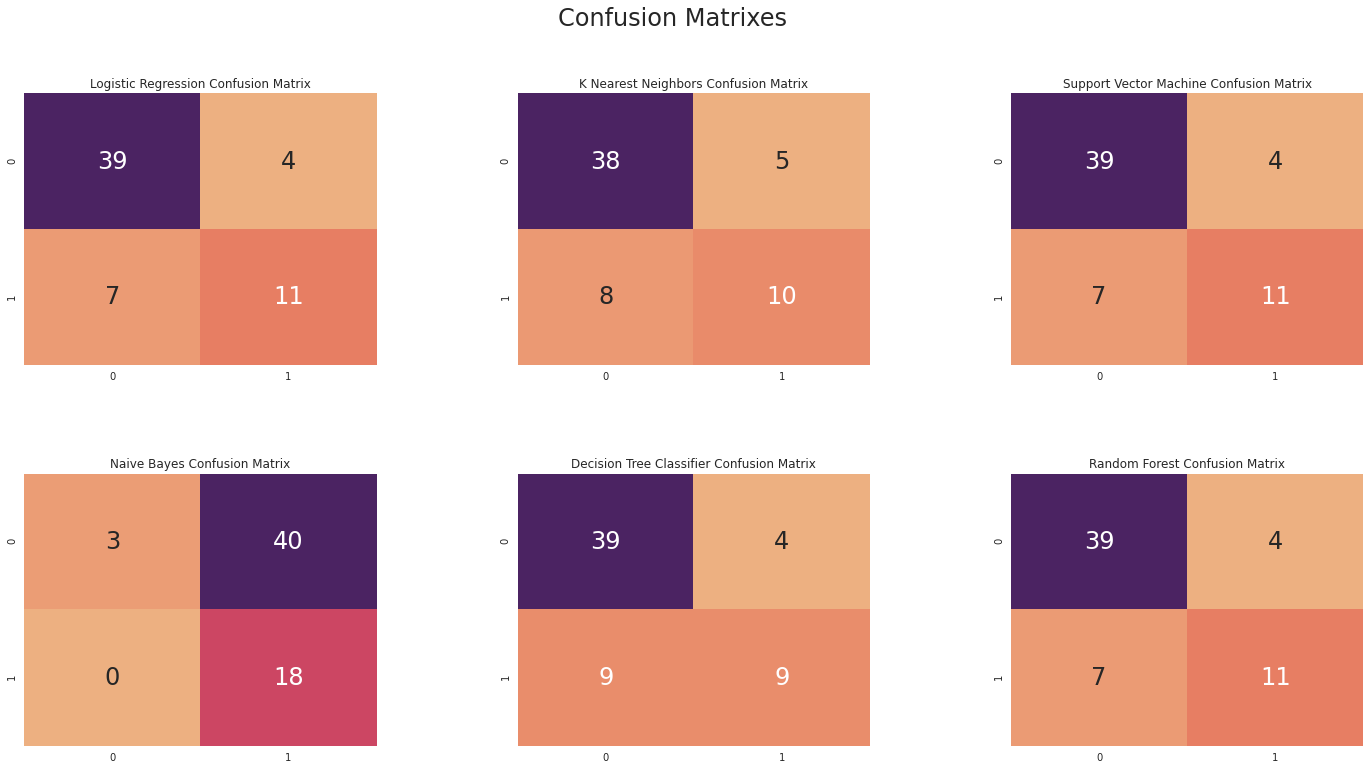

In [48]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="flare",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="flare",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="flare",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="flare",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="flare",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,6)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="flare",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()
